<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ol>
    <li><a href="#Brownian motion">Brownian motion</a></li>
    <li><a href="#Geometric Brownian motion">Geometric Brownian motion</a></li>
    <li><a href="#Log-return">Asset returns</a></li>
    <li><a href="#Expected return and volatility ">Expected return and volatility</a></li>
    <li><a href="#Risk Return">Risk/Return diagram</a></li>
    <li><a href="#Correlation">Correlation matrix</a></li>
    <li><a href="#Crypto data">Crypto data acquisition</a></li>
  </ol>
</div>
<br>
<hr>


Required libraries:
<ul>
  <li><b>numpy</b></li>
  <li><b>pandas</b></li>
  <li><b>matplotlib</b></li>
  <li><b>seaborn</b></li>
  <li><b>yfinance</b> (fallback)</li>
  <li><b>requests</b> (exchange REST)</li>
</ul>


In [2]:
!pip install numpy pandas matplotlib seaborn yfinance requests

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached curl_cffi-0.13.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached 

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('dark_background')

try:
    import yfinance as yf
except Exception:
    yf = None

import warnings as wrn
wrn.filterwarnings('ignore', category=FutureWarning)
wrn.filterwarnings('ignore', category=UserWarning)


<div id="Brownian motion">
  <h2>1) Price model with Brownian motion</h2>
</div>


<b>Bachelier</b> (1900) described the price process as:

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>


Text(0.5, 1.0, 'Price modeled with Brownian motion')

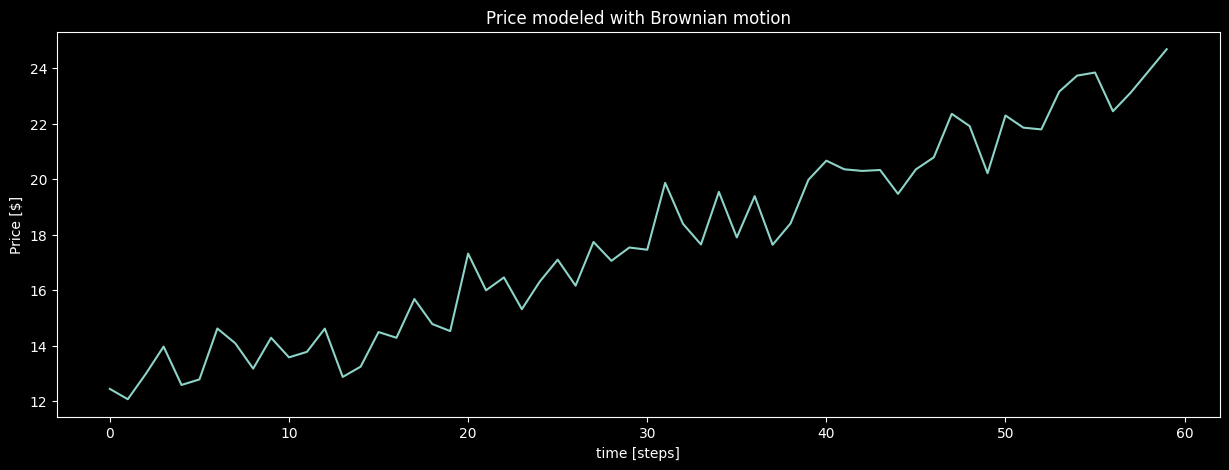

In [4]:
p0=12
mu=0.2
sigma=0.9
n=60
np.random.seed(42)
w = np.random.normal(0,1, n)
t=np.arange(0,n)

p1=p0+mu*t+sigma*w

fig = plt.subplots(figsize=(15, 5))
plt.plot(p1)
plt.ylabel('Price [$]')
plt.xlabel('time [steps]')
plt.title('Price modeled with Brownian motion')


<div id="Geometric Brownian motion">
  <h2>2) Price model with Geometric Brownian motion</h2>
</div>


A better model is the <b>Geometric Brownian Motion</b> (GBM):
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dt + \sigma dw(t) \\
 p(t)  =p(0)\exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>


Text(0.5, 1.0, 'Price modeled with Geometric Brownian Motion')

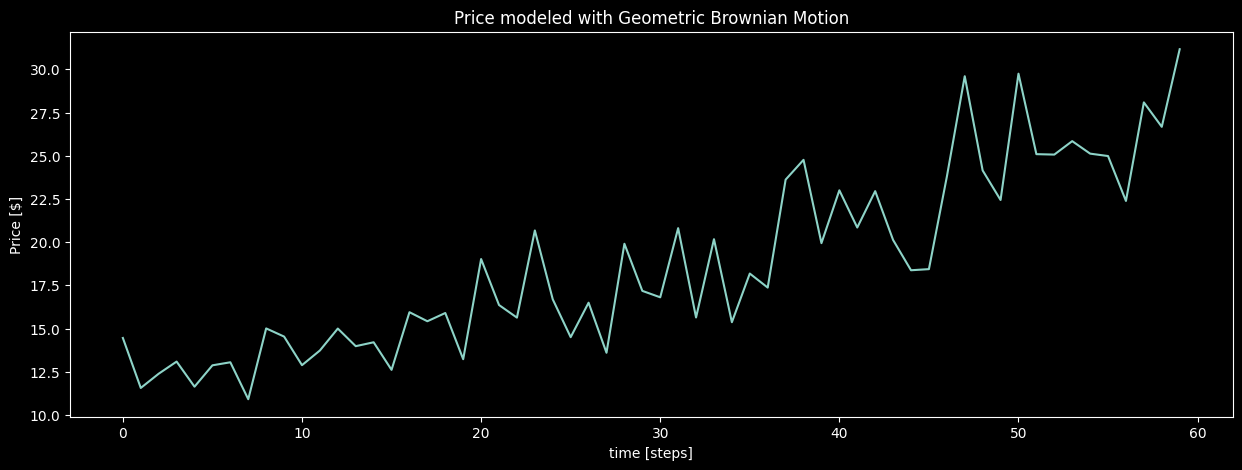

In [5]:
p0=12
mu=0.02
sigma=0.11
n=60
np.random.seed(7)
w = np.random.normal(0,1, n)
t=np.arange(0,n)
p2=p0*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(15, 5))
plt.plot(p2)
plt.ylabel('Price [$]')
plt.xlabel('time [steps]')
plt.title('Price modeled with Geometric Brownian Motion')


In [6]:
df=pd.DataFrame({'p1':p1, 'p2':p2})
df.describe()


,p1,p2
count,60.000000,60.000000
mean,17.760811,18.714881
std,3.576332,5.229718
min,12.075562,10.908442
25%,14.520180,14.487390
50%,17.586886,17.273242
75%,20.352663,22.961464
max,24.677991,31.161897


Text(0.5, 1.0, 'Brownian vs Geometric Brownian')

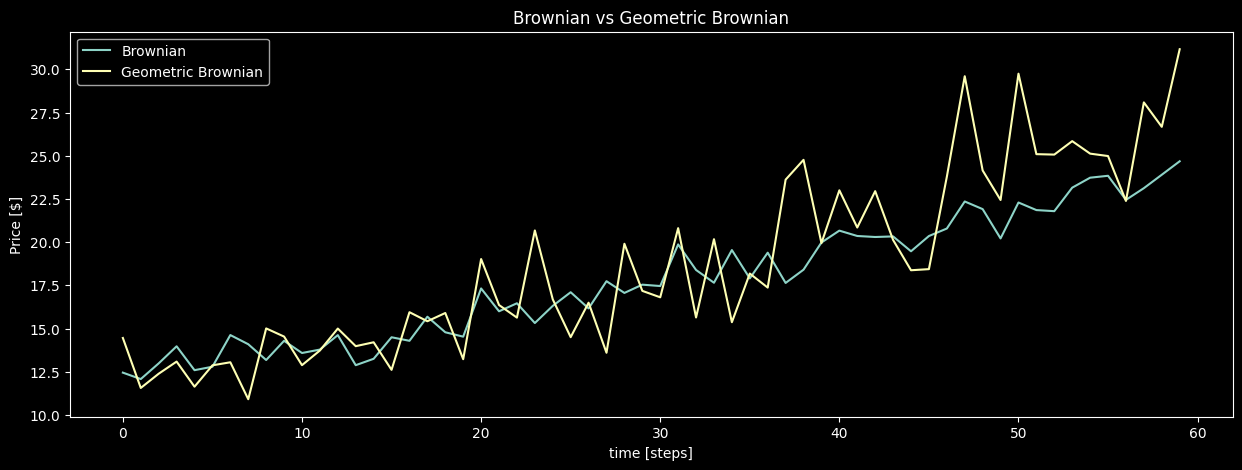

In [7]:
fig = plt.subplots(figsize=(15, 5))
plt.plot(df['p1'],label='Brownian')
plt.plot(df['p2'],label='Geometric Brownian')
plt.legend(loc='upper left')
plt.ylabel('Price [$]')
plt.xlabel('time [steps]')
plt.title('Brownian vs Geometric Brownian')


<div id="Log-return">
  <h2>3) Asset returns</h2>
</div>


Returns in discrete time can be defined as:
<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=\ln[p(n)]-\ln[p(n-1)]\approx \frac{p(n)}{p(n-1)}-1
\end{equation}
$
</ul>


Text(0.5, 1.0, 'Returns (Brownian)')

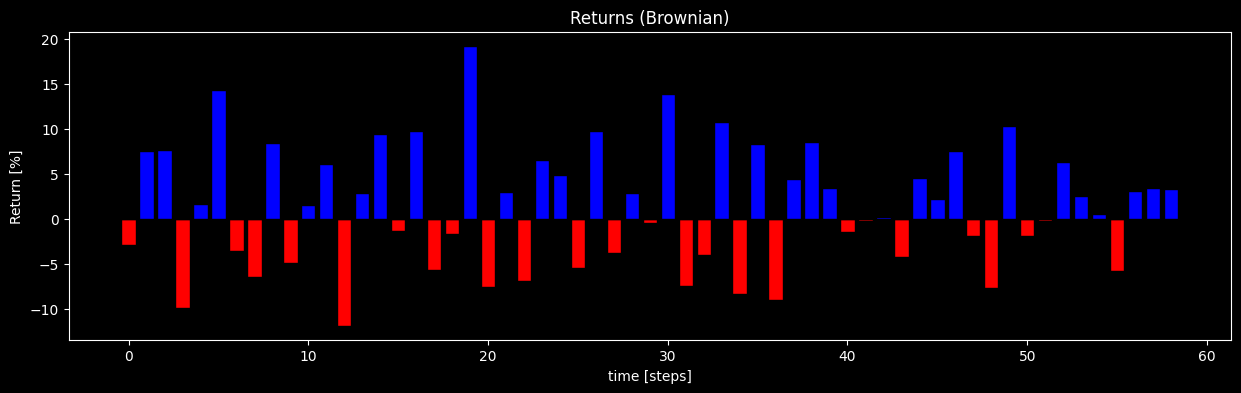

In [8]:
r1=np.log(df['p1']).diff().dropna()
fig = plt.subplots(figsize=(15, 4))
up = (np.exp(r1)-1).clip(lower=0)
down = (np.exp(r1)-1).clip(upper=0)
plt.bar(range(len(up)),100*down,color='red',edgecolor='black')
plt.bar(range(len(up)),100*up,color='blue',edgecolor='black')
plt.ylabel('Return [%]')
plt.xlabel('time [steps]')
plt.title('Returns (Brownian)')


Text(0.5, 1.0, 'Cumulative return (Brownian)')

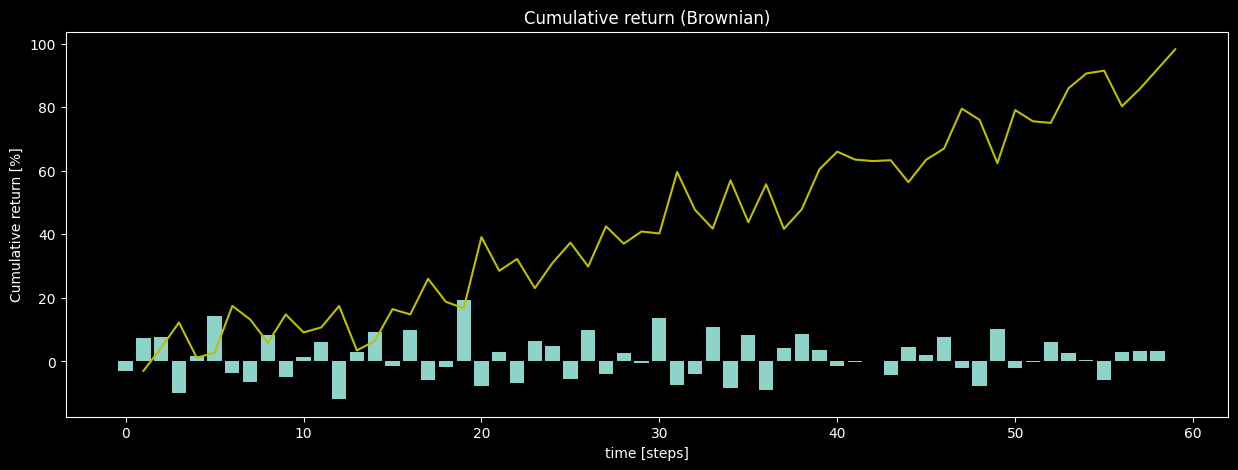

In [9]:
def cum_perc(returns: pd.Series) -> pd.Series:
    persum=np.cumprod(1 + returns.values) - 1
    return 100*pd.Series(persum, index=returns.index)

fig = plt.subplots(figsize=(15, 5))
plt.plot(cum_perc(np.exp(r1)-1),"y")
plt.bar(range(len(r1)),100*((np.exp(r1)-1)))
plt.ylabel('Cumulative return [%]')
plt.xlabel('time [steps]')
plt.title('Cumulative return (Brownian)')


<div id="Expected return and volatility">
  <h2>4) Expected return and volatility</h2>
</div>


Mean and standard deviation of returns define expected return (μ) and volatility (σ):
<ul>
$ \large
\begin{equation} 
\mu=E[ r(n) ]\\
\sigma=\sqrt{E[r(n)^2]-\mu^2}
\end{equation}
$
</ul>


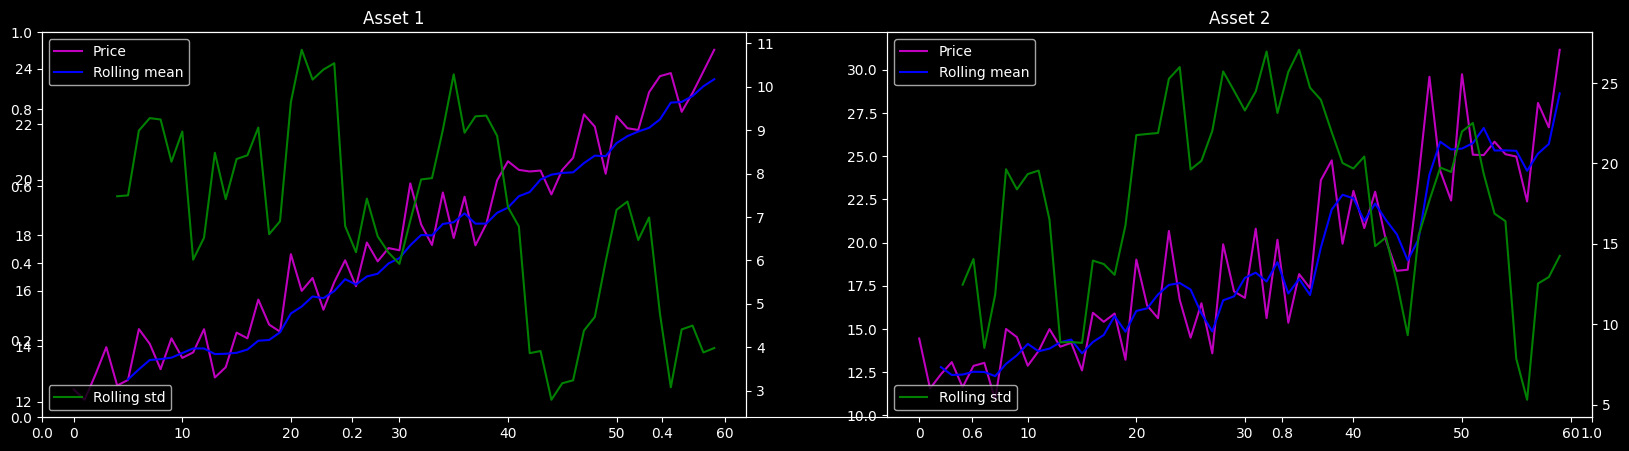

In [10]:
r1 = 100*np.concatenate(([0], np.diff(np.log(df['p1']))))
r2 = 100*np.concatenate(([0], np.diff(np.log(df['p2']))))
roll=5

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2,1)
ax1.plot(df['p1'], c='m', label='Price')
ax1.plot(pd.Series(df['p1']).rolling(window=6).mean(), c='b', label='Rolling mean')
ax2=ax1.twinx()
ax2.plot(pd.Series(r1).rolling(window=roll).std(), c='g', label='Rolling std')
ax1.set_title('Asset 1')
ax1.legend(loc='upper left')
ax2.legend(loc='lower left')

ax3=plt.subplot(1,2,2)
ax3.plot(df['p2'], c='m', label='Price')
ax3.plot(pd.Series(df['p2']).rolling(window=3).mean(), c='b', label='Rolling mean')
ax4=ax3.twinx()
ax4.plot(pd.Series(r2).rolling(window=roll).std(), c='g', label='Rolling std')
ax3.set_title('Asset 2')
ax3.legend(loc='upper left')
ax4.legend(loc='lower left')


<div id="Risk Return">
  <h2>5) Risk/Return diagram</h2>
</div>


Text(0.5, 1.0, 'Risk/Return (Simulated)')

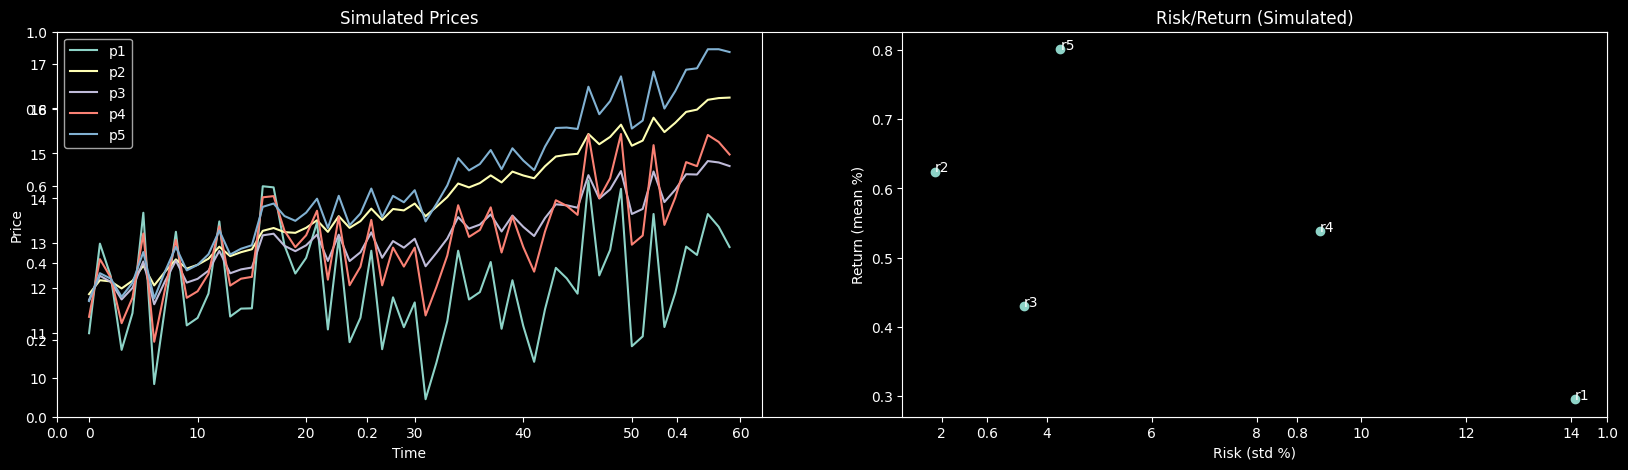

In [11]:
def gbm(p0, mu, sigma, t):
    np.random.seed(123)
    w = np.random.normal(0,1, t)
    t_arr=np.arange(0,t)
    return p0*np.exp((mu-(sigma**2)/2)*t_arr+sigma*w)

po=[12,12,12,12,12]
mu=[.003, 0.005, 0.0033, 0.0041, 0.006]
sigma=[0.08, 0.01, 0.02, 0.05, 0.022]
T=60

sim=None
for i in range(len(po)):
    path = gbm(po[i], mu[i], sigma[i], T)
    sim = pd.DataFrame(path) if sim is None else pd.concat([sim,pd.DataFrame(path)],axis=1)

sim.columns=[f'p{i}' for i in range(1,len(po)+1)]
ret=100*sim.diff()/sim.iloc[0]
ret.columns=[f'r{i}' for i in range(1,len(po)+1)]
simret=pd.concat([sim,ret], axis=1).dropna()

fig = plt.subplots(figsize=(20,5))
ax=plt.subplot(1,2,1)
sim.iloc[:, :5].plot(ax=ax)
ax.set_title('Simulated Prices')
ax.set_ylabel('Price')
ax.set_xlabel('Time')

ax2=plt.subplot(1,2,2)
means=ret.mean()
risks=ret.std()
plt.scatter(risks,means)
for i, txt in enumerate(ret.columns):
    plt.annotate(txt,(risks[i],means[i]))
plt.xlabel('Risk (std %)')
plt.ylabel('Return (mean %)')
plt.title('Risk/Return (Simulated)')


<div id="Correlation">
  <h2>6) Correlation matrix</h2>
</div>


Text(0.5, 1.0, 'Correlation between simulated assets')

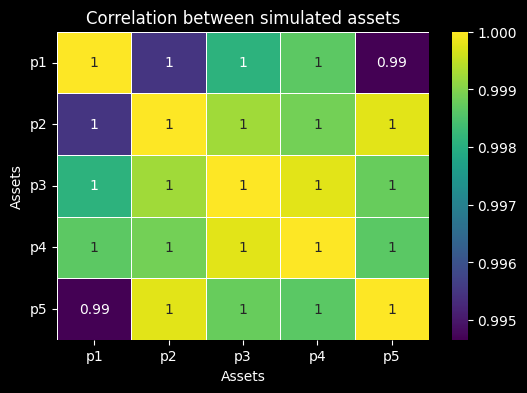

In [12]:
corr = sim.diff().corr()
ret2 = 100*sim.diff()/sim.iloc[0]

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(ret2.corr(), annot=True, linewidths=.5, ax=ax, cmap='viridis')
plt.yticks(rotation=0)
ax.set_ylabel("Assets")
ax.set_xlabel("Assets")
ax.set_title("Correlation between simulated assets")


<div id="Crypto data">
  <h2>7) Crypto data acquisition (exchange or fallback)</h2>
</div>


In [25]:
symbols = ['BTC-USD', 'ETH-USD', 'ADA-USD']
start_date = (pd.Timestamp.now() - pd.Timedelta(days=180)).strftime('%Y-%m-%d')
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')

market = pd.DataFrame()

if yf is not None:
    try:
        # Download all symbols at once for efficiency.
        data = yf.download(
            symbols,
            start=start_date,
            end=end_date,
            interval='1d',
            progress=False
        )

        if not data.empty and 'Close' in data.columns:
            market = data['Close']
            # Clean data: drop tickers with no data, then drop days with any missing data
            market = market.dropna(axis=1, how='all')
            market = market.dropna(axis=0, how='any')

        if not market.empty:
            print(f"Successfully downloaded data for: {list(market.columns)}")
        else:
            print("No valid, overlapping data found for the requested symbols.")

    except Exception as e:
        print(f"An error occurred during data download: {e}")
else:
    print("yfinance module 'yf' is not available.")

Successfully downloaded data for: ['ADA-USD', 'BTC-USD', 'ETH-USD']


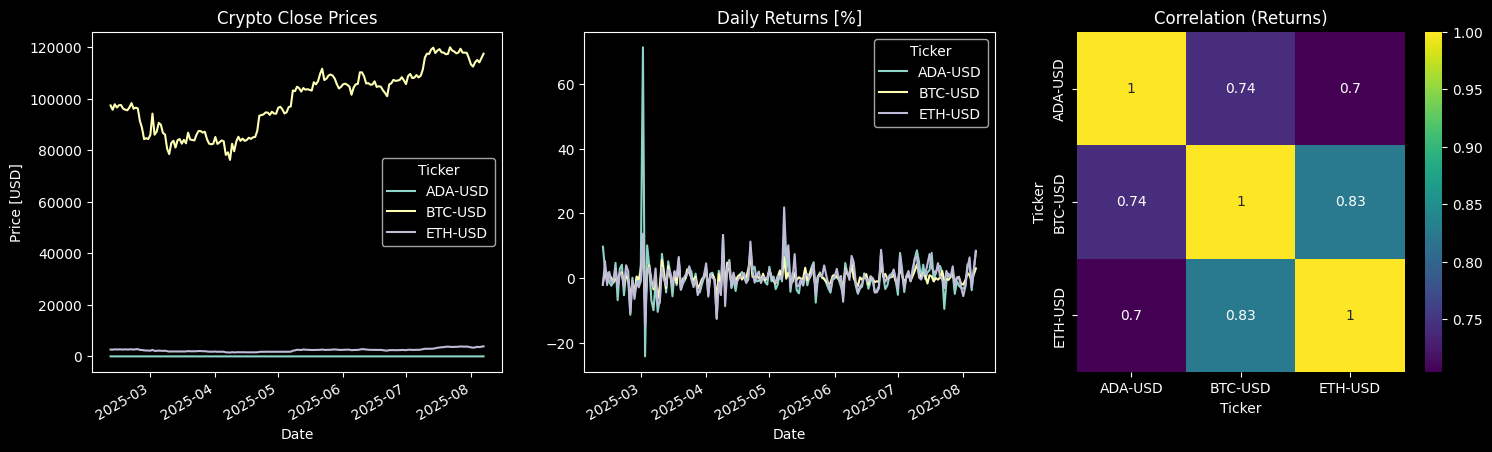

In [26]:
if len(market.columns) >= 2:
    rets = market.pct_change().dropna()
    fig, axs = plt.subplots(1, 3, figsize=(18,5))
    market.plot(ax=axs[0], title='Crypto Close Prices')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price [USD]')

    (100*rets).plot(ax=axs[1], title='Daily Returns [%]')
    axs[1].set_xlabel('Date')

    sns.heatmap(rets.corr(), annot=True, cmap='viridis', ax=axs[2])
    axs[2].set_title('Correlation (Returns)')
else:
    print('No market data available (check internet or yfinance).')
